In [1]:
from truco import *

In [ ]:
def simulacion1(num_de_sim):
    tres_33_exacto = 0
    al_menos_tres_33 = 0
    cantidad_de_partidas = 0
    for n in range(num_de_sim):
        mazo = Mazo()
        mazo.barajar()
        juego = Partida()
        juego.repartir(mazo)
        jugadores_con_33 = 0
        for jugador in juego.partida:
            res = juego.partida[jugador].mano_con_33()
            if res:
                jugadores_con_33 += 1

        if jugadores_con_33 == 3:
            tres_33_exacto += 1
            cantidad_de_partidas += 1
            al_menos_tres_33 += 1
        elif jugadores_con_33 == 4:
            al_menos_tres_33 += 1

    return (tres_33_exacto/num_de_sim, al_menos_tres_33/num_de_sim)


In [ ]:
%%time

tres_33_exacto, al_menos_tres_33 = simulacion1(2500000)

print(f"Prob de al menos 3 con 33 = {al_menos_tres_33:0.8f}")
print(f"Prob de exactamente 3 con 33 = {tres_33_exacto:0.8f}")


In [ ]:
%%timeit

tres_33_exacto, al_menos_tres_33 = simulacion1(2500000)

print(f"Prob de al menos 3 con 33 = {al_menos_tres_33:0.8f}")
print(f"Prob de exactamente 3 con 33 = {tres_33_exacto:0.8f}")


In [6]:
jugadores = ["Jugador 1", "Jugador 2", "Jugador 3",
             "Jugador 4", "Jugador 5", "Jugador 6"]

def simulacion2(num_de_sim, num_jugadores=6):
    tres_33_exacto = 0
    al_menos_tres_33 = 0
    cantidad_de_partidas = 0
    
    resultado = {}
    for j in jugadores[:num_jugadores]:
        resultado[j] = {20:0}
        for i in range(21, 34):
            resultado[j][i] = 0
    
    for n in range(num_de_sim):
        mazo = Mazo()
        mazo.barajar()
        juego = Partida(num_jugadores)
        juego.repartir(mazo)
        #jugadores_con_33 = 0
        for jugador in juego.partida:
            punto = juego.partida[jugador].puntos_mano()
            if punto != 0:
                num = resultado[jugador].get(punto, 0)
                resultado[jugador][punto] += 1
            #if res:
            #    jugadores_con_33 += 1

        #if jugadores_con_33 == 3:
        #    tres_33_exacto += 1
        #    cantidad_de_partidas += 1
        #    al_menos_tres_33 += 1
        #elif jugadores_con_33 == 4:
        #    al_menos_tres_33 += 1

    return resultado#(tres_33_exacto/num_de_sim, al_menos_tres_33/num_de_sim)


In [7]:
%%time

resultado = simulacion2(2500000)

print(f"Diccionario = {resultado}")
#print(f"Prob de exactamente 3 con 33 = {tres_33_exacto:0.8f}")

Diccionario = {'Jugador 1': {20: 92018, 21: 94044, 22: 94030, 23: 127239, 24: 127966, 25: 162735, 26: 161571, 27: 197059, 28: 102660, 29: 106870, 30: 71993, 31: 74184, 32: 37079, 33: 38461}, 'Jugador 2': {20: 92097, 21: 94469, 22: 94327, 23: 127071, 24: 127307, 25: 161782, 26: 162123, 27: 197388, 28: 102720, 29: 106636, 30: 71710, 31: 73939, 32: 37368, 33: 38467}, 'Jugador 3': {20: 92456, 21: 94043, 22: 94167, 23: 127663, 24: 127673, 25: 161595, 26: 162546, 27: 197564, 28: 103126, 29: 106252, 30: 71630, 31: 73818, 32: 37120, 33: 38281}, 'Jugador 4': {20: 92136, 21: 93985, 22: 94311, 23: 127424, 24: 128047, 25: 161733, 26: 161715, 27: 197507, 28: 102977, 29: 106492, 30: 71763, 31: 73650, 32: 37428, 33: 38619}, 'Jugador 5': {20: 92471, 21: 93984, 22: 94263, 23: 127741, 24: 127775, 25: 160914, 26: 161945, 27: 197097, 28: 103128, 29: 105915, 30: 71878, 31: 74436, 32: 37868, 33: 38415}, 'Jugador 6': {20: 92385, 21: 94620, 22: 94463, 23: 126953, 24: 127414, 25: 161894, 26: 162868, 27: 197024

In [8]:
import pandas as pd

In [9]:
data = pd.DataFrame(resultado, 
                    index=list(range(20, 34)),
                    columns=jugadores)
data

Jugador 1  Jugador 2  Jugador 3  Jugador 4  Jugador 5  Jugador 6
20      92018      92097      92456      92136      92471      92385
21      94044      94469      94043      93985      93984      94620
22      94030      94327      94167      94311      94263      94463
23     127239     127071     127663     127424     127741     126953
24     127966     127307     127673     128047     127775     127414
25     162735     161782     161595     161733     160914     161894
26     161571     162123     162546     161715     161945     162868
27     197059     197388     197564     197507     197097     197024
28     102660     102720     103126     102977     103128     103444
29     106870     106636     106252     106492     105915     106703
30      71993      71710      71630      71763      71878      71205
31      74184      73939      73818      73650      74436      74107
32      37079      37368      37120      37428      37868      37480
33      38461      38467      38281      38619      38415      38190

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

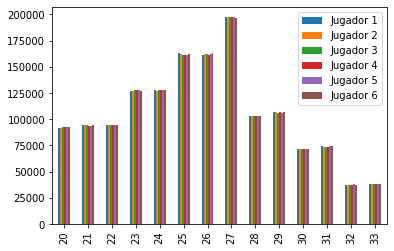

In [11]:
data.plot.bar();

In [ ]:
data.info()

In [ ]:
plt.plot(data.index, data["Jugador 1"]);

In [ ]:
index = [0]+list(range(20, 34))
index